In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers,models

# Introduction

MNIST (Modified National Institute of Standards and Technology) veri seti, el yazısıyla yazılmış 70,000 adet 28x28 piksel boyutunda gri tonlamalı rakam (0-9) içeren bir veri setidir. Bu veri seti, özellikle makine öğrenmesi ve derin öğrenme algoritmalarını test etmek ve geliştirmek için yaygın olarak kullanılır. MNIST, eğitim için 60,000, test için ise 10,000 örnek içerir ve basit bir şekilde el yazısı rakamların tanınması için temel bir benchmark olarak kabul edilir.

In [3]:
# mnist veri setini yükleme
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# veriyi normalize etme
x_train,x_test=x_train/255.0 ,x_test/255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# modeli oluşturma
model=models.Sequential([layers.Flatten(input_shape=(28,28)),#Flatten: 28x28'lik iki boyutlu görüntüleri tek boyutlu bir vektöre dönüştürür. Sinir ağlarına girdi olarak düzleştirilmiş veriler vermek için kullanılır.
                        layers.Dense(128,activation='relu'),#Dense (128 nöronlu, ReLU aktivasyonu): Tam bağlantılı katman. Verileri işler ve doğrusal olmayan dönüşümler uygulayarak öğrenme yeteneğini artırır.
                        layers.Dense(100,activation='relu'),
                         layers.Dense(80,activation='relu'),## DAha fazla daerin katman katarak deha iyi öğrenmesiini sağlıyoruz
                         layers.Dense(80,activation='relu'),
                         layers.Dense(40,activation='relu'),

                        layers.Dropout(0.2),#Dropout (0.2): Aşırı öğrenmeyi önlemek için eğitim sırasında rastgele olarak bazı nöronları kapatır.
                        layers.Dense(10,activation='softmax')])#Dense (10 nöronlu, Softmax aktivasyonu): Çıktı katmanı. 10 sınıf arasında olasılık dağılımı üretir (0-9 rakamları).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# modeli derleme
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [8]:
# model eğitimi
model.fit(x_train,y_train,epochs=10,batch_size=50,validation_split=0.1)

Epoch 1/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7925 - loss: 0.6553 - val_accuracy: 0.9655 - val_loss: 0.1180
Epoch 2/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9595 - loss: 0.1493 - val_accuracy: 0.9655 - val_loss: 0.1126
Epoch 3/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9704 - loss: 0.1035 - val_accuracy: 0.9760 - val_loss: 0.0918
Epoch 4/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9778 - loss: 0.0782 - val_accuracy: 0.9787 - val_loss: 0.0804
Epoch 5/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9822 - loss: 0.0593 - val_accuracy: 0.9768 - val_loss: 0.0863
Epoch 6/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9782 - val_loss: 0.0808
Epoch 7/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9862 - loss: 0.0446 - val_accuracy: 0.9783 - val_loss: 0.0935
Epoch 8/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9892 - loss: 0.0372

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1080


In [12]:
print(f"test accuracy:{test_acc}")

test accuracy:0.9761000275611877


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


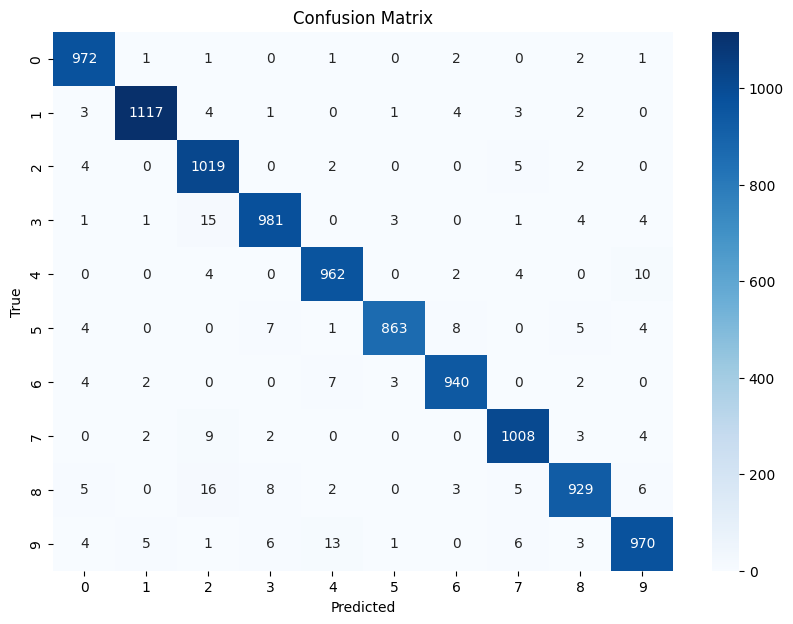

In [14]:
# Sonuc olarak
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tahminleri yap
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Sınıf etiketlerini al

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred_classes)

# Görselleştir
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

